In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
import statsmodels.api as sm

In [3]:
flc = '/Users/pinqingkan/Desktop/Codes/Course_ISLR/data/'
fname = flc + 'Auto.data'

In [4]:
X0 = pd.read_csv(fname, sep = '\s+')
Nrow, Ncol = X0.shape

In [5]:
# some rows in 'horsepower' can't be converted to floats (missing data), disregard
X = X0.copy()
for i in range(Nrow):
    try:
        float(X0.loc[i, 'horsepower'])
    except ValueError:
        X = X.drop([i], axis = 0)
X['horsepower'] = X['horsepower'].astype(float)

In [6]:
X = X.dropna(axis = 0, how = 'any')
Nrow, Ncol = X.shape

9 - (a) Produce a scatterplot matrix which includes all of the variables in the data set.

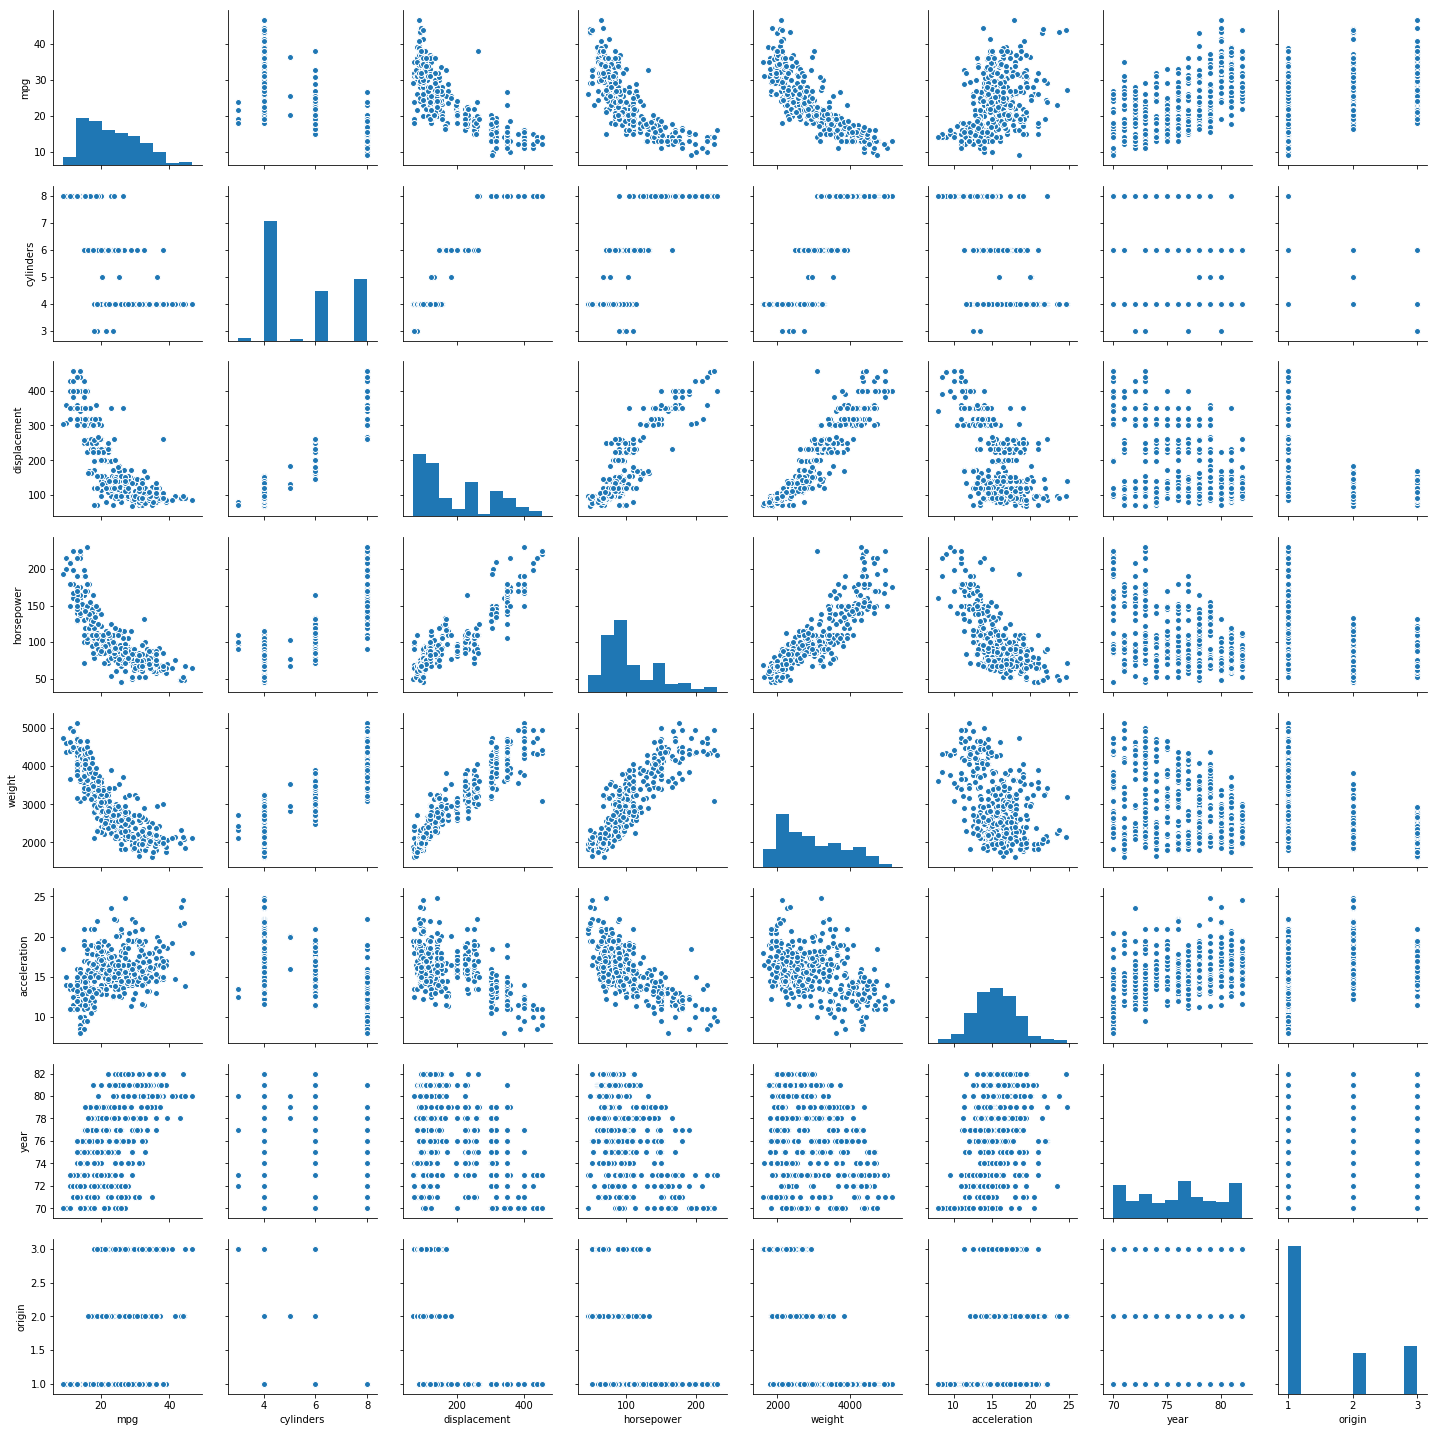

In [7]:
sns.pairplot(X)

9 - (b) Compute the matrix of correlations between the variables using the function cor().

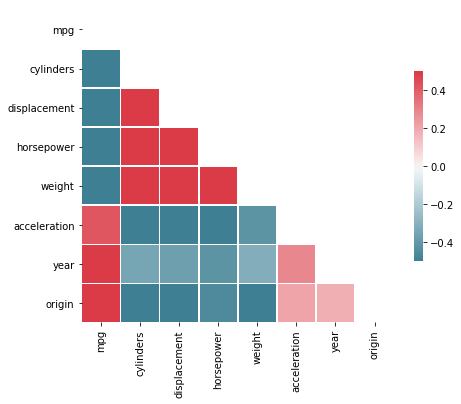

In [8]:
# the correlation removes the variance thus X2 / X makes no difference
Y = X.iloc[:, :-1].corr()
plt.figure(figsize = (7, 7))
# Generate a mask for the upper triangle
mask = np.zeros_like(Y, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(Y, mask=mask, cmap=cmap, vmax=.5, vmin = -.5, linewidths=.5, square=True, cbar_kws={"shrink": .5})

9 - (c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors.

In [9]:
xx = X.drop(['name', 'mpg'], axis = 1)
xx = sm.add_constant(xx) # OLS does not include intercept by default
yy = X.mpg.copy()
results = sm.OLS(yy, xx).fit()

In [10]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          2.04e-139
Time:                        21:58:28   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

9 - (d) Use the plot() function to produce diagnostic plots of the linear regression fit.

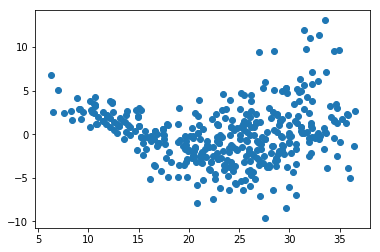

In [11]:
residuals = results.resid
# residual plot
plt.scatter(results.predict(xx), residuals)

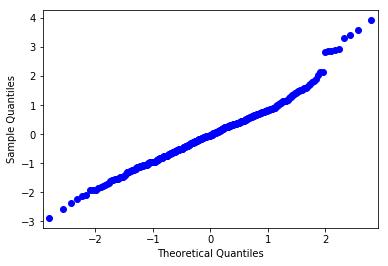

In [12]:
fig = sm.qqplot(results.resid_pearson)
plt.show()

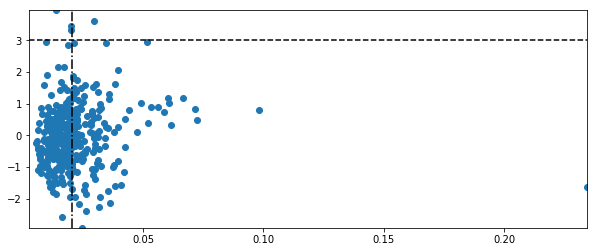

In [13]:
infl = results.get_influence()
resd_std = infl.resid_studentized_internal
hatDiag  = infl.hat_diag_factor
hi0 = (1 + Ncol - 2) / Nrow
plt.figure(figsize = (10, 4))
plt.scatter(hatDiag, resd_std)
plt.plot([1/Nrow, max(hatDiag)], [-3, -3], '--k')
plt.plot([1/Nrow, max(hatDiag)], [3, 3], '--k')
plt.plot([hi0, hi0], [min(resd_std), max(resd_std)], '-.k')
ax = plt.axis([1/Nrow, max(hatDiag), min(resd_std), max(resd_std)])

9 - (e) Use the * and : symbols to fit linear regression models with interaction effects

In [14]:
iformula = 'mpg ~ 1'
features = X.columns
for i in range(1, Ncol):
    if features[i] == 'mpg' or features[i] == 'name': continue
    for j in range(1, Ncol):
        if features[j] == 'mpg' or features[j] == 'name': continue
        if features[j] == features[i]: continue
        iformula += ' + ' + features[i] + '*' + features[j]

In [15]:
results2 = sm.OLS.from_formula(formula = iformula, data = X).fit()

In [16]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          4.01e-155
Time:                        21:58:28   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

9 - (f) Try a few different transformations of the variables, such as log(X), √X, X2

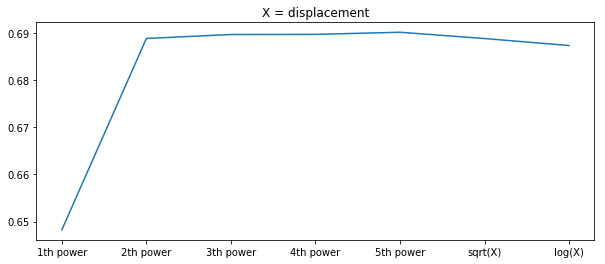

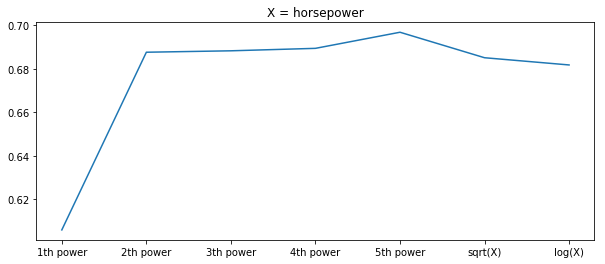

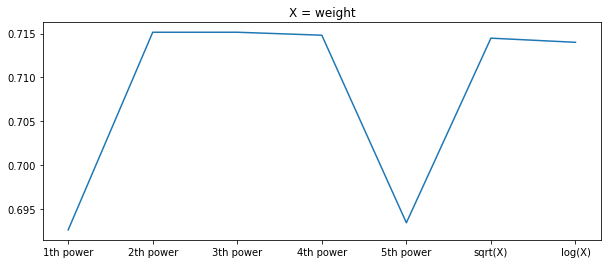

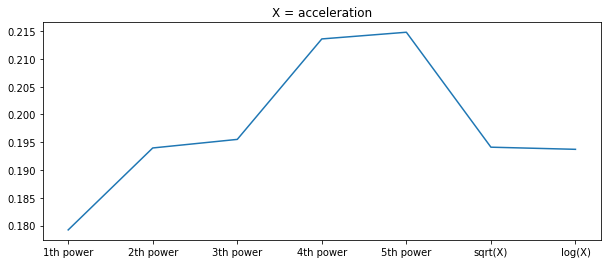

In [17]:
fcol = ['displacement', 'horsepower', 'weight', 'acceleration']
for icol in fcol:
    iformula0 = 'mpg ~ 1'
    rsquareds = []; xx = []
    for i in range(1, 8):
        if i == 1:
            iformula = iformula0
        if i < 6:
            iformula += ' + np.power(' + icol + ', ' + str(i) + ')'
            flegends = str(i) + 'th power'
        elif i == 6:
            iformula = iformula0 + ' + np.power(' + icol + ', 0.5)' + ' + np.power(' + icol + ', 1)'
            flegends = 'sqrt(X)'
        elif i == 7:
            iformula = iformula0 + ' + np.log(' + icol + ')' + ' + np.power(' + icol + ', 1)'
            flegends = 'log(X)'
        results0 = sm.OLS.from_formula(formula = iformula, data = X).fit()
        rsquareds.append(results0.rsquared)
        xx.append(flegends)
    plt.figure(figsize = (10, 4))
    plt.plot(range(1, 8), rsquareds)
    plt.xticks(range(1, 8), xx)
    plt.title('X = ' + icol)

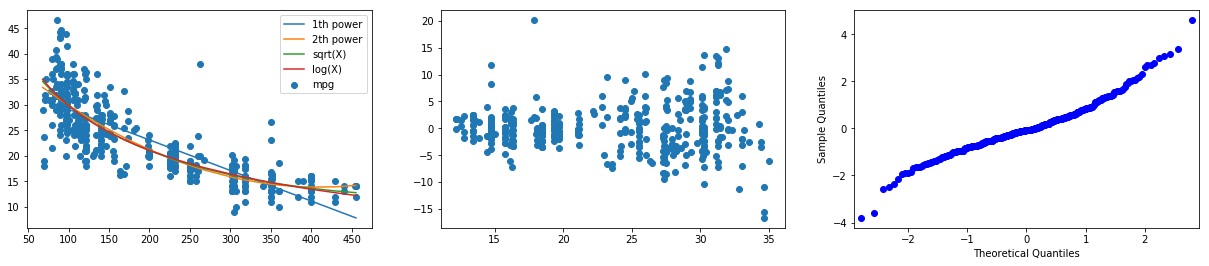

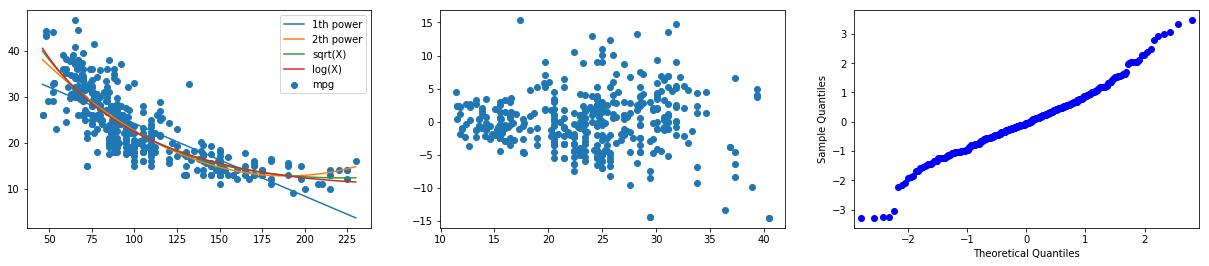

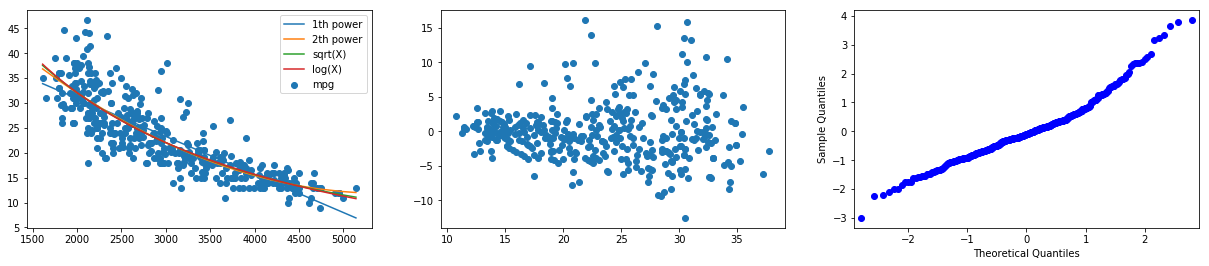

In [18]:
fcol = ['displacement', 'horsepower', 'weight']
cnt = 0
for icol in fcol:
    iformula0 = 'mpg ~ 1'
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (21, 4))
    #plt.subplot(1, 3, 1)
    ax1.scatter(X[icol], X['mpg'])
    ind = np.argsort(X[icol])
    for i in range(1, 5):
        if i == 1:
            iformula = iformula0
        if i < 3:
            iformula += ' + np.power(' + icol + ', ' + str(i) + ')'
            flegends = str(i) + 'th power'
        elif i == 3:
            iformula = iformula0 + ' + np.power(' + icol + ', 0.5)' + ' + np.power(' + icol + ', 1)'
            flegends = 'sqrt(X)'
        elif i == 4:
            iformula = iformula0 + ' + np.log(' + icol + ')' + ' + np.power(' + icol + ', 1)'
            flegends = 'log(X)'
        results0 = sm.OLS.from_formula(formula = iformula, data = X).fit()
        #print(icol, ' v.s. mpg')
        #print(results0.pvalues)
        yy = results0.fittedvalues
        ax1.plot(X[icol].iloc[ind], yy.iloc[ind], label = flegends)
    #ax1.title('X = ' + icol)
    ax1.legend()
    #plt.subplot(1, 3, 2)
    ax2.scatter(yy, results0.resid)
    #plt.subplot(1, 3, 3)
    sm.qqplot(results0.resid_pearson, ax = ax3)

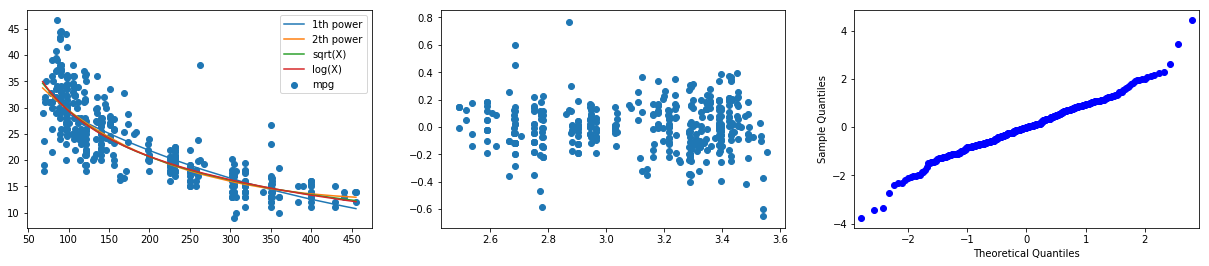

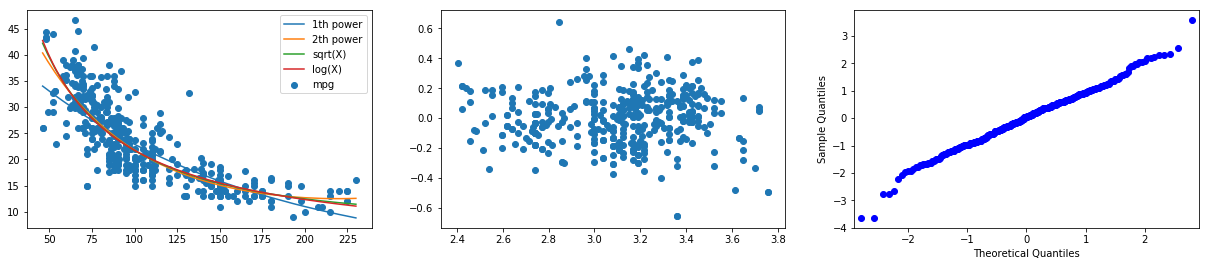

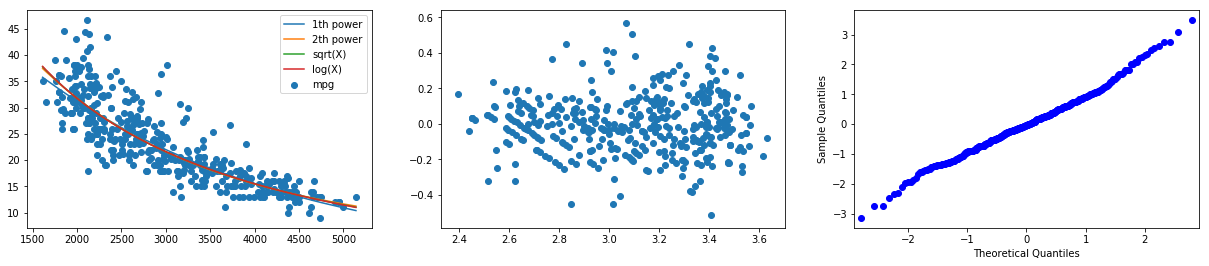

In [19]:
fcol = ['displacement', 'horsepower', 'weight']
cnt = 0
for icol in fcol:
    iformula0 = 'np.log(mpg) ~ 1'
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (21, 4))
    #plt.subplot(1, 3, 1)
    ax1.scatter(X[icol], X['mpg'])
    ind = np.argsort(X[icol])
    for i in range(1, 5):
        if i == 1:
            iformula = iformula0
        if i < 3:
            iformula += ' + np.power(' + icol + ', ' + str(i) + ')'
            flegends = str(i) + 'th power'
        elif i == 3:
            iformula = iformula0 + ' + np.power(' + icol + ', 0.5)' + ' + np.power(' + icol + ', 1)'
            flegends = 'sqrt(X)'
        elif i == 4:
            iformula = iformula0 + ' + np.log(' + icol + ')' + ' + np.power(' + icol + ', 1)'
            flegends = 'log(X)'
        results0 = sm.OLS.from_formula(formula = iformula, data = X).fit()
        #print(icol, ' v.s. mpg')
        #print(results0.pvalues)
        yy = results0.fittedvalues
        ax1.plot(X[icol].iloc[ind], np.power(math.e, yy.iloc[ind]), label = flegends)
    #ax1.title('X = ' + icol)
    ax1.legend()
    #plt.subplot(1, 3, 2)
    ax2.scatter(yy, results0.resid)
    #plt.subplot(1, 3, 3)
    sm.qqplot(results0.resid_pearson, ax = ax3)

In [20]:
iformula = 'np.log(mpg) ~ 1'
features = X.columns
for i in range(1, Ncol):
    if features[i] == 'mpg' or features[i] == 'name': continue
    for j in range(1, Ncol):
        if features[j] == 'mpg' or features[j] == 'name': continue
        if features[j] == features[i]: continue
        iformula += ' + ' + features[i] + '*' + features[j]

In [21]:
results2 = sm.OLS.from_formula(formula = iformula, data = X).fit()

In [22]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            np.log(mpg)   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     132.5
Date:                Sun, 05 Aug 2018   Prob (F-statistic):          4.92e-172
Time:                        21:58:32   Log-Likelihood:                 340.98
No. Observations:                 392   AIC:                            -624.0
Df Residuals:                     363   BIC:                            -508.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             